Problem Statement:

    Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 

-	Rude: It denotes comments that are very rude and offensive.

-	Threat: It contains indication of the comments that are giving any threat to someone. 	

-	Abuse: It is for comments that are abusive in nature. 

-	Loathe: It describes the comments which are hateful and loathing in nature. 

-	ID: It includes unique Ids associated with each comment text given.   

-	Comment text: This column contains the comments extracted from various social media platforms. 


In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the train dataset

df = pd.read_csv("mtrain.csv")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
# shape of the train dataset

df.shape

(159571, 8)

In [6]:
#checking null values present in dataset

df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
#summary of train dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
#summary of test dataset

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [10]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [11]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [12]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [13]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [14]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [15]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

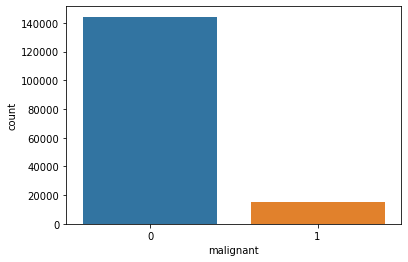

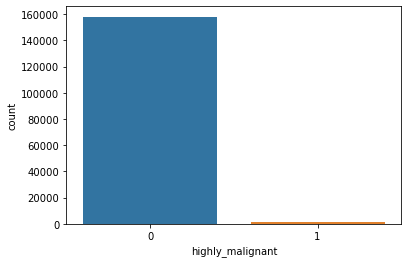

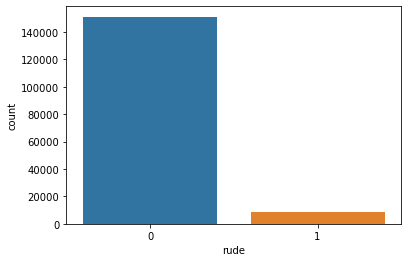

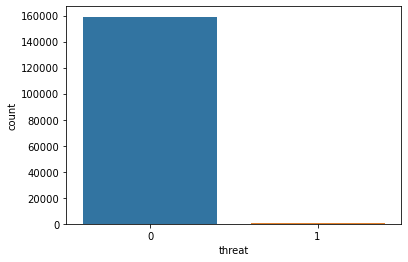

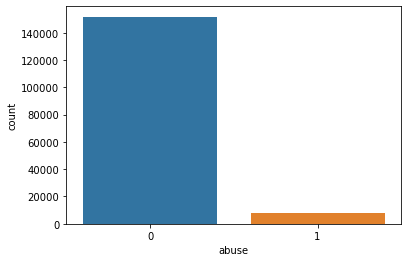

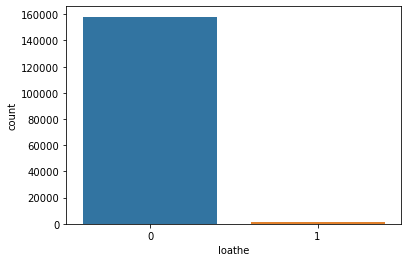

In [16]:
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
for i in columns:
    sns.countplot(df[i])
    plt.show()

In [17]:
#Storing the number of counts for every target label
count=df.iloc[:,2:].sum()
count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

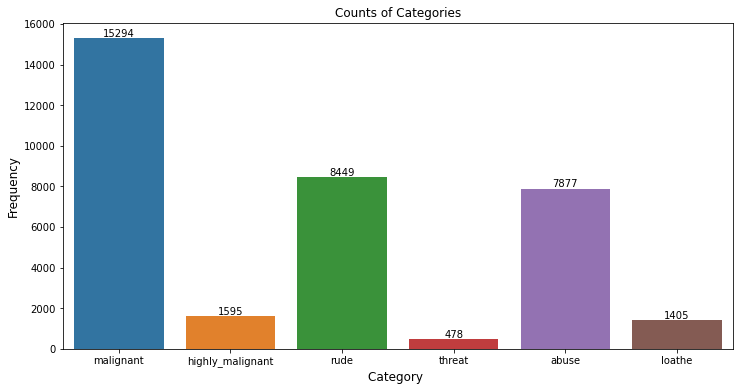

In [18]:
#Plotting the counts of each category
plt.figure(figsize=(12,6))
ax = sns.barplot(count.index, count.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

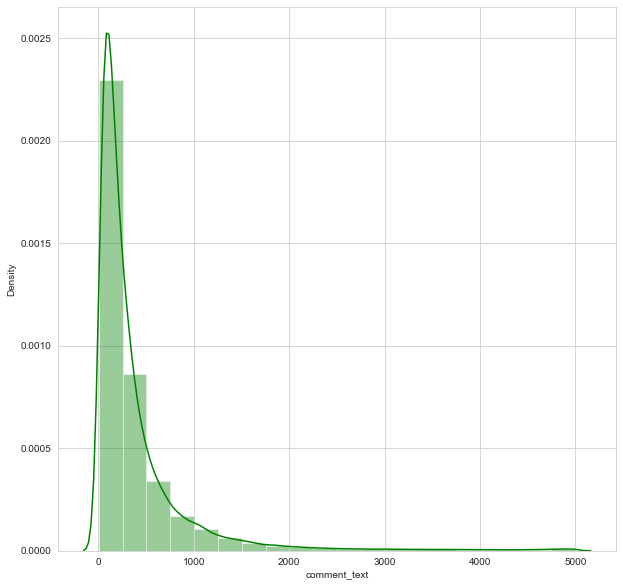

In [19]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
comment_len = df.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'green')

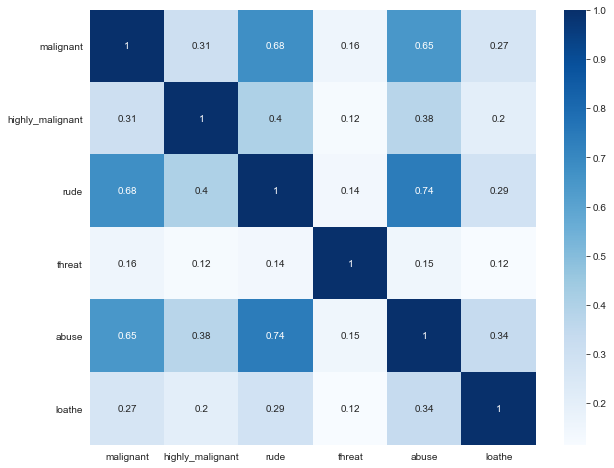

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap= "Blues")
plt.show()

* No negative correlation in the dataset.
* Rude and malignant are correlated.
* Likewise, Abuse and rude are correlated each other.

In [21]:
# Creating a new feature by merging all output variables,

df['label']=df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']].sum(axis=1)

In [22]:
df.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


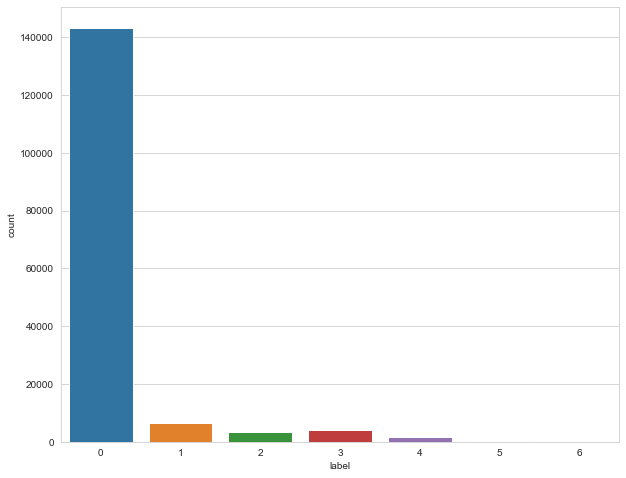

In [23]:
plt.figure(figsize = (10,8))
sns.countplot(df['label'])
plt.show()

* 0 denotes that the comments does not have any malignant
* 1 denotes that the comments has any one of the malignant 
* 2-6 denotes that the comments has that many malignant words.

In [24]:
df['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [25]:
#converting label as 0 and 1

df['label'] = [1 if out >0 else 0 for out in df['label']]

In [26]:
df['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bramee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bramee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bramee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
#Replacing '\n' in comment_text
df['comment_text'] = df['comment_text'].replace('\n',' ')

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [33]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df['comment_text'] = df['comment_text'].apply(clean_comments)

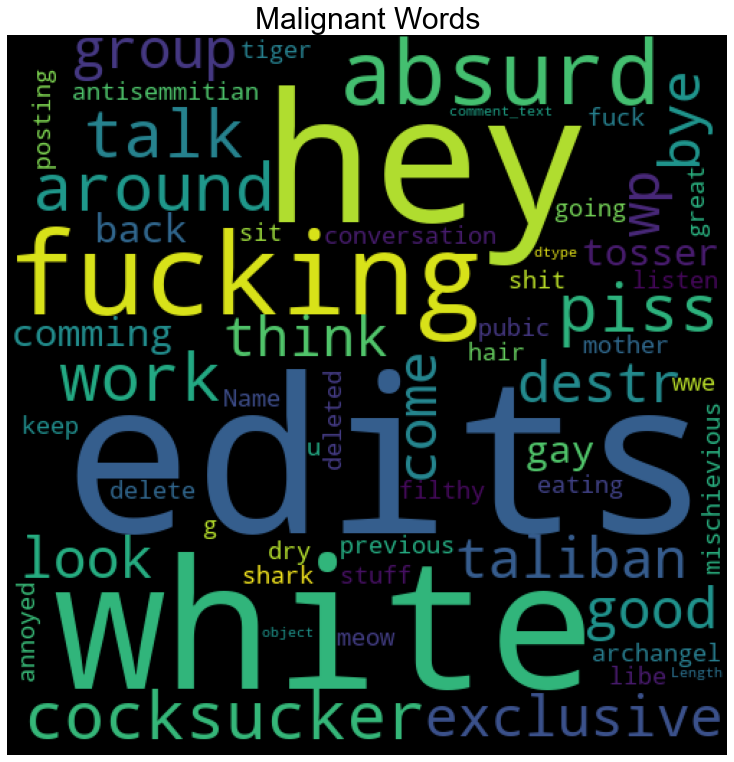

In [34]:
df_malignant=df[(df['malignant']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Malignant Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used malignant words in this category.

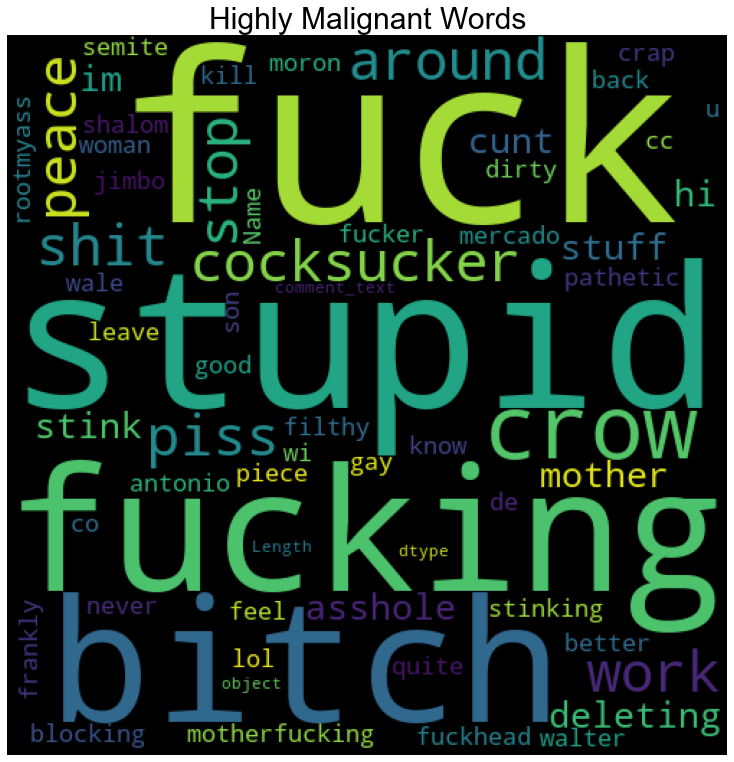

In [35]:
df_highlymalignant=df[(df['highly_malignant']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Highly Malignant Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used highly malignant words in this category.

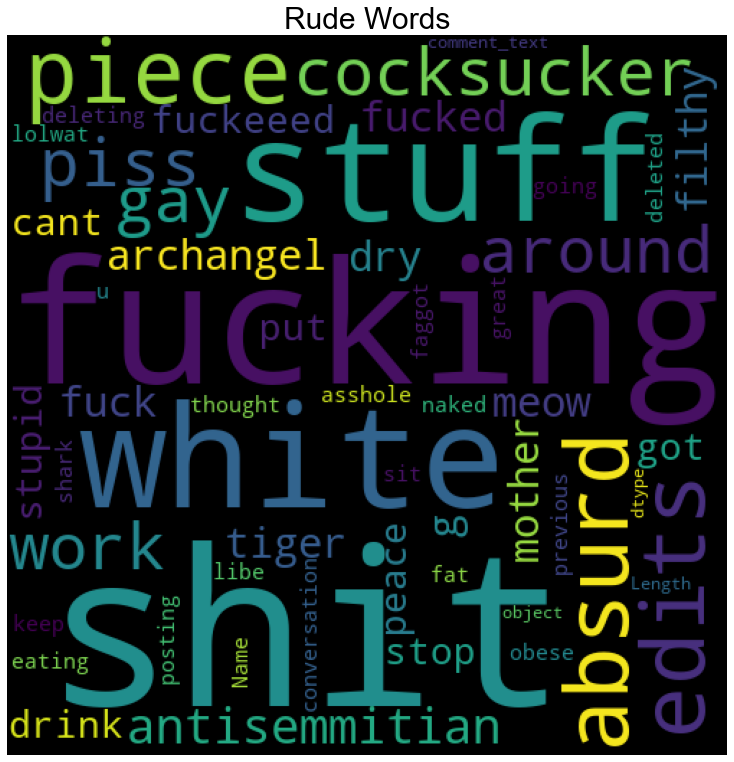

In [36]:
df_rude=df[(df['rude']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Rude Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used rude words in this category.

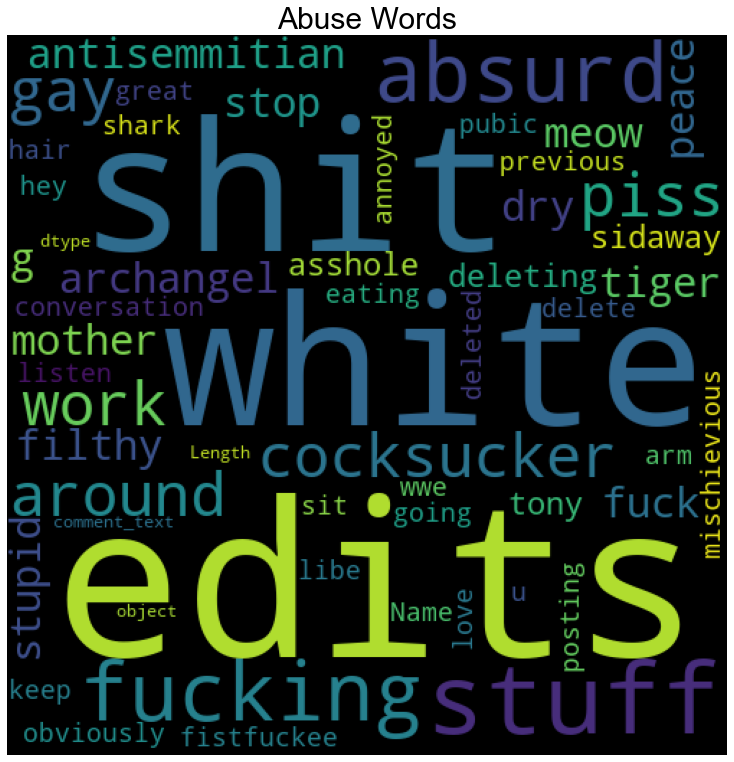

In [37]:
df_abuse=df[(df['abuse']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Abuse Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used Abused words in this category.

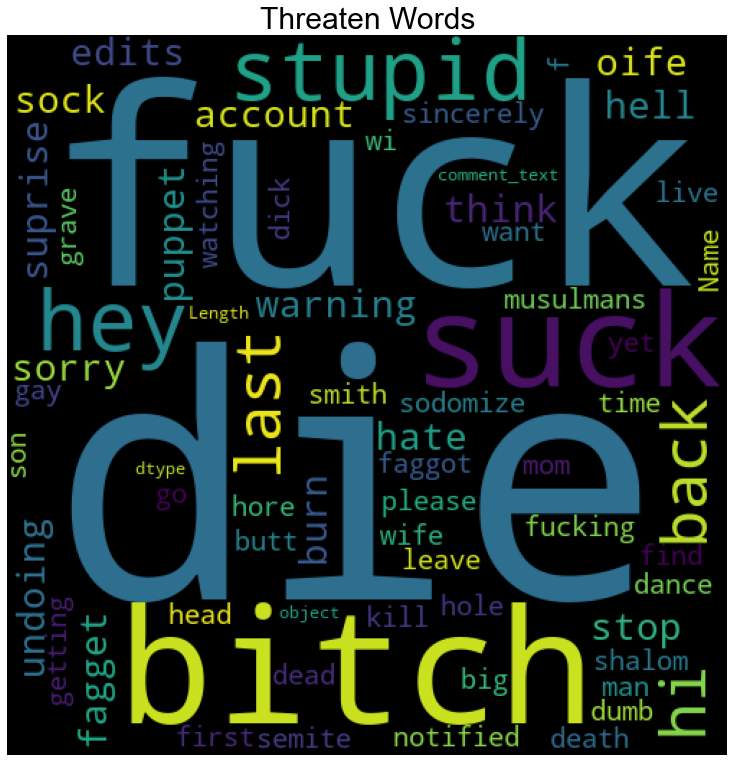

In [38]:
df_threat=df[(df['threat']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Threaten Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used words for threaten.

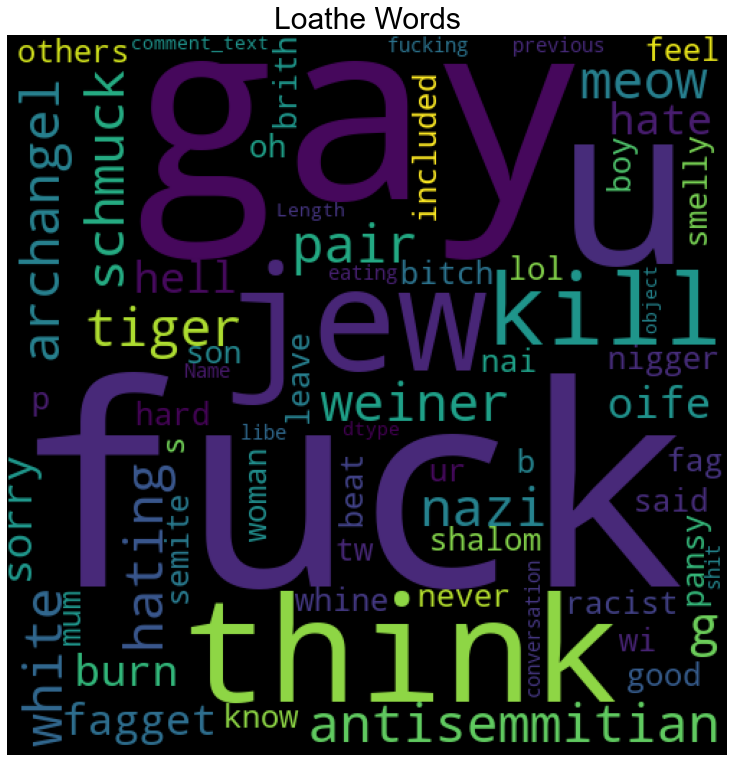

In [39]:
df_loathe=df[(df['loathe']==1)]

#Plotting for malignant
wordcloud=WordCloud(height=500,width=500,max_words=500).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Loathe Words',fontdict={'fontsize':30, 'fontweight':30, 'color':'Black'})
plt.show()

The font which is big in size are often used as a loathe words in this category.

In [40]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')

In [41]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df['comment_text'])

In [42]:
y = df['label']

<AxesSubplot:xlabel='label', ylabel='count'>

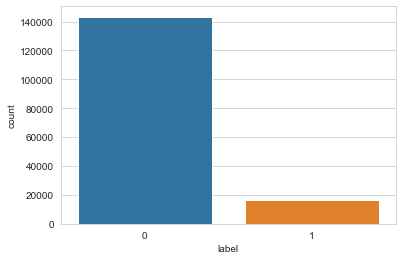

In [43]:
sns.countplot(y)

We can see that label classes are im-balanced and I am uising SMOTE technique to balance the classes.

In [44]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)

<AxesSubplot:xlabel='label', ylabel='count'>

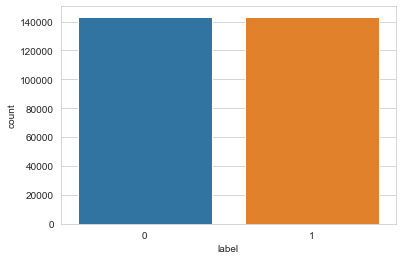

In [45]:
sns.countplot(y_over)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = 555)

Model : 1  Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
scr_lor = cross_val_score(lor,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_lor.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9312489724338248
CV Score : 0.9308491833495225
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     35600
           1       0.92      0.94      0.93     36073

    accuracy                           0.93     71673
   macro avg       0.93      0.93      0.93     71673
weighted avg       0.93      0.93      0.93     71673

--------------------------------------------------------

Confusion Matrix 
 [[32670  2930]
 [ 2088 33985]]
ROC AUC Score 
 0.9299070011590106


Model 2: Gradient Boost

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

sv = GradientBoostingClassifier()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
scr_sv = cross_val_score(sv,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_sv.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8089057954799732
CV Score : 0.8340275010230529
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     35600
           1       0.96      0.70      0.81     36073

    accuracy                           0.83     71673
   macro avg       0.86      0.83      0.83     71673
weighted avg       0.86      0.83      0.83     71673

--------------------------------------------------------

Confusion Matrix 
 [[34412  1188]
 [10768 25305]]
ROC AUC Score 
 0.8340617029076807


Model 3 : Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)  
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_dt.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9471481753213228
CV Score : 0.9490743081229518
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     35600
           1       0.93      0.97      0.95     36073

    accuracy                           0.95     71673
   macro avg       0.95      0.95      0.95     71673
weighted avg       0.95      0.95      0.95     71673

--------------------------------------------------------

Confusion Matrix 
 [[32927  2673]
 [ 1217 34856]]
ROC AUC Score 
 0.9455892931063321


Model 4 : Multi Nomial Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
scr_mnb = cross_val_score(mnb,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_mnb.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8945887294364718
CV Score : 0.8966661080214134
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     35600
           1       0.90      0.89      0.89     36073

    accuracy                           0.89     71673
   macro avg       0.90      0.90      0.89     71673
weighted avg       0.90      0.89      0.89     71673

--------------------------------------------------------

Confusion Matrix 
 [[32196  3404]
 [ 4125 31948]]
ROC AUC Score 
 0.8950152842379233


Model 5: Passive Aggressive

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
y_pred = pac.predict(x_test)
scr_pac = cross_val_score(pac,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_pac.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))


F1 score 
 0.9366608921611087
CV Score : 0.9374276562746404
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93     35600
           1       0.92      0.96      0.94     36073

    accuracy                           0.93     71673
   macro avg       0.94      0.93      0.93     71673
weighted avg       0.94      0.93      0.93     71673

--------------------------------------------------------

Confusion Matrix 
 [[32389  3211]
 [ 1469 34604]]
ROC AUC Score 
 0.9345401961908079


Out of all models, Passive agressive classifier and Logistic regression model has high CV Score and top of that Passive Aggressive works well.

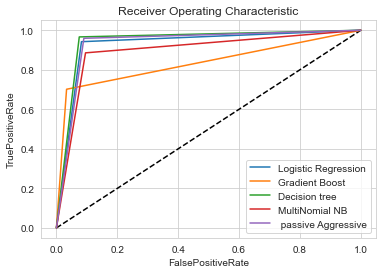

In [54]:
# roc auc curve for all the models

y_pred_prob1 = lor.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = sv.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = dt.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = mnb.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = pac.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Gradient Boost")
plt.plot(fpr3, tpr3, label= "Decision tree")
plt.plot(fpr4, tpr4, label= "MultiNomial NB")
plt.plot(fpr5, tpr5, label = " passive Aggressive")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

In [57]:
#Lets try to improve the accuracy of model by hyper parameter tuning,

param = {'C': [1.0,1.2,1.4,1.6,1.8],
        'fit_intercept':[True], 'max_iter': [1000]}

# Applying randomized search CV to increase the accuracy,

rg = RandomizedSearchCV(pac, param_distributions = param, cv= 5)
rg.fit(x_train,y_train)
rg.best_params_

{'max_iter': 1000, 'fit_intercept': True, 'C': 1.0}

In [60]:
#final model accuracy,

model = PassiveAggressiveClassifier(C = 1.0, max_iter = 1000, fit_intercept = True)
                               
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


print("F1 score \n", f1_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9379345589520827
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     35600
           1       0.91      0.97      0.94     36073

    accuracy                           0.94     71673
   macro avg       0.94      0.94      0.94     71673
weighted avg       0.94      0.94      0.94     71673

--------------------------------------------------------

Confusion Matrix 
 [[32187  3413]
 [ 1202 34871]]
ROC AUC Score 
 0.9354039464139041


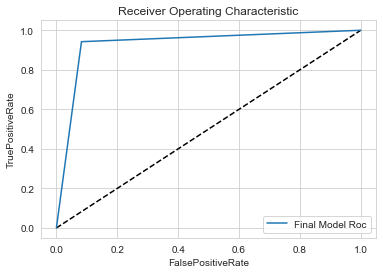

In [61]:
#Roc Curve for final model,

y_pred_fin = model.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Model Roc")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

In [76]:
import joblib
joblib.dump(model,"Malignantcomment.pkl")

['Malignantcomment.pkl']

In [77]:
# Loading the test dataset

te = pd.read_csv("mtest.csv")
te

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [78]:
# shape of the test dataset

te.shape

(153164, 2)

In [79]:
#checking null values present in dataset

te.isnull().sum()

id              0
comment_text    0
dtype: int64

In [80]:
#aplying to test data,

te['comment_text'] = te['comment_text'].apply(clean_comments)
test = tf_vec.fit_transform(te['comment_text'])

In [81]:
#Loading the test data

mod = joblib.load("Malignantcomment.pkl")
prediction = mod.predict(test)
prediction = pd.DataFrame(prediction)

In [82]:
# To get the data in CSV format,

prediction.to_csv("Malignant_classifier_comments_Prediction.csv", index = 'False')